# Pre-processing of SDQ items in each MCS sweep

pre-processing include 1) extract variables 2) investigate if any missing data 3)remove outliers (in this case, no outliers as we are dealing with categorical data) 4) examine differences across sweeps

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# display all columns in dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
# load data 
df_SDQ = pd.read_csv('mcs3_parent.csv',encoding='mac_roman')
df_SDQ.shape

In [ ]:
# only keep 1st cohort member and main interview
df_SDQ = df_SDQ.loc[df_SDQ['EPNUM00'] ==1]# only main interview
df_SDQ = df_SDQ.loc[df_SDQ['ECNUM00'] =='1st Cohort Member of the family'] # only CM

In [ ]:
# extract variables of interest 
df_SDQ = df_SDQ[['MCSID','column1','column2' etc ]]
# rename columns 
df_SDQ.columns = ['MCSID', 'bully','friend','nervous', etc]
df_SDQ.head()

In [ ]:
# explore values per variable: 
df_SDQ['worry'].value_counts()

In [27]:
# replace invalid values by NaN: 
df_SDQ = df_SDQ.replace(['Not applicable'],np.NaN) 
df_SDQ = df_SDQ.replace(['Can t say'],np.NaN)
df_SDQ = df_SDQ.replace(["Don't Know"],np.NaN)

## check amount of missing values

In [29]:
# count number of missing data per CM: 
NaN_per_row = df_SDQ.isnull().sum(axis=1)
print(len(NaN_per_row),"participants with at least 1 missing value")

if participants have only one variable missing -> impute from two other variables 

In [30]:
# df_nonan: remove rows with at least 1 nan 
df_nonan = df_SDQ.dropna(axis = 0)
df_nonan.shape

(14947, 25)

In [ ]:
## check that no rows have exactly the same observations 
print("are there duplicates? ", df_nonan.iloc[:,1:].duplicated().any())

In [32]:
# if any duplicates only keep one measure per child 
df_nonan_nodup = df_nonan.drop_duplicates(subset=['MCSID'], keep='first', inplace=False)

In [ ]:
df_nonan_nodup.shape

## replace strings by numerical data 

In [34]:
mapping = {'Not true' : 1, 'Somewhat true' : 2, 'Certainly true': 3}
df_toimpute_nodup = df_toimpute_nodup.replace(mapping)
df_toimpute_nodup.head()

,MCSID,CPSDPF00,CPSDRO00,CPSDHS00,CPSDSR00,CPSDTT00,CPSDSP00,CPSDOR00,CPSDMW00,CPSDHU00,...,CPSDDC00,CPSDNC00,CPSDKY00,CPSDOA00,CPSDVH00,CPSDST00,CPSDCS00,CPSDGB00,CPSDFE00,CPSDTE00
0,M10001N,2.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,...,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0
1,M10002P,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
3,M10007U,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0
5,M10011Q,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
7,M10015U,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


## add age and gender (and remove observations missing these variables)

In [81]:
df= pd.read_csv('mcs3_hhgrid.csv')
df = df[['MCSID','CHCSEX00','CHCAGE00']]
df.head()

,MCSID,CPNUM00,CELIG00,CRESP00,CCNUM00,CHINTM00,CHINTY00,CHCSEX00,CHCDBM00,CHCDBY00,...,CHPDCM00,CHPSPY00,CHPSPM00,CHSAOC00,CHPSOC00,CHNVOC00,CHPCOC00,CHHTOC00,CHWTOC00,CHWSOC00
0,M10001N,1,Main Interview,Main Interview,NaN,6,2006,Not applicable,Not applicable,Not applicable,...,Not applicable,Not Applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
1,M10001N,2,Proxy Interview,Proxy Interview,NaN,6,2006,Not applicable,Not applicable,Not applicable,...,Not applicable,Not Applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
2,M10001N,3,Not eligible,No Interview,NaN,6,2006,Not applicable,Not applicable,Not applicable,...,Not applicable,Not Applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
3,M10001N,4,Not eligible,No Interview,NaN,6,2006,Not applicable,Not applicable,Not applicable,...,Not applicable,Not Applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
4,M10001N,5,Not eligible,No Interview,NaN,6,2006,Not applicable,Not applicable,Not applicable,...,Not applicable,Not Applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable


In [82]:
df['CHCSEX00'].value_counts()

Not applicable    56418
Male               7878
Female             7553
Name: CHCSEX00, dtype: int64

In [ ]:
df['CHCAGE00'].value_counts()

In [83]:
df = df.replace(['Not applicable'],np.NaN) 

In [84]:
df = df.dropna(axis = 0)

In [90]:
df_demographics = df.drop_duplicates(subset=['MCSID'], keep='first', inplace=False)
df_demographics.shape

## merge two dataframes based on MCSID

In [94]:
df_final = pd.merge(df_demographics, df_nonan_nodup, on="MCSID", indicator=True, how='right')

# identify CM with low and high levels of anxiety based on cut-off scores

In [4]:
df_typical = df_final.copy()
df_atypical = df_final.copy()

In [5]:
df_typical = df_final.loc[(df_final['bully']<2)&(df_final['fear']<2)&(df_final['nervous']<2)]
df_typical.shape

(8364, 8)

In [7]:
df_atypical =  df_final.loc[(df_final['worry']>1)&(df_final['fear']>1)&(df_final['nervous']>1)]
df_atypical.shape

(6205, 8)

In [9]:
df_atypical.describe()

,MCSID,age,gender,emotion,conduct,hyper,peer,antisocial
0,M10001N,5.218344,Female,3,4,8,0,1
2,M10007U,5.481177,Male,1,2,5,0,5
5,M10016V,5.560575,Male,3,4,6,4,3
6,M10018X,4.898015,Female,1,3,3,0,2
8,M10021S,5.470226,Female,0,3,1,0,0
...,...,...,...,...,...,...,...,...
14556,M35854H,5.078713,Male,1,1,8,2,2
14561,M35865L,5.177276,Male,1,1,4,5,2
14564,M35869Q,5.018480,Female,3,3,4,1,4
14565,M35871J,5.440110,Male,0,4,6,3,5


# vizualisation atypical: check variance/density items

In [10]:
dfSDQ = df_atypical[['emotion', 'conduct', 'hyper', 'peer', 'antisocial']]## to adapt 

<AxesSubplot:ylabel='Density'>

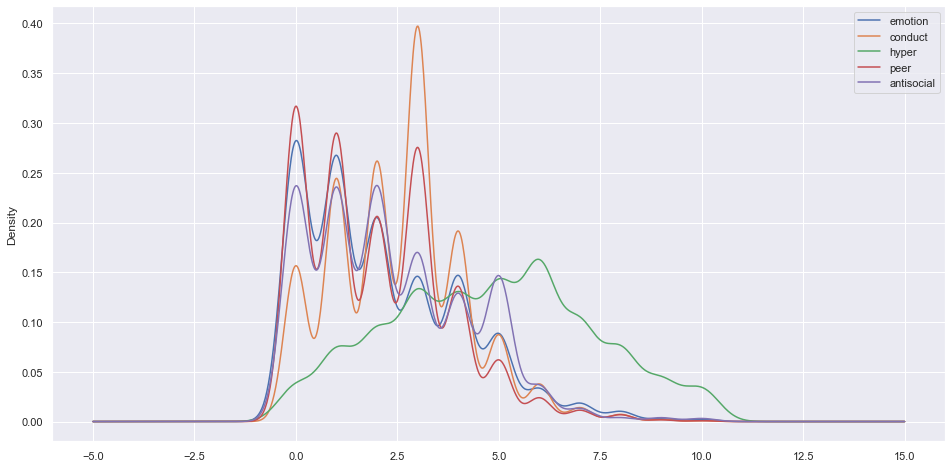

In [11]:
dfSDQ.plot(kind='density', figsize=[16,8])

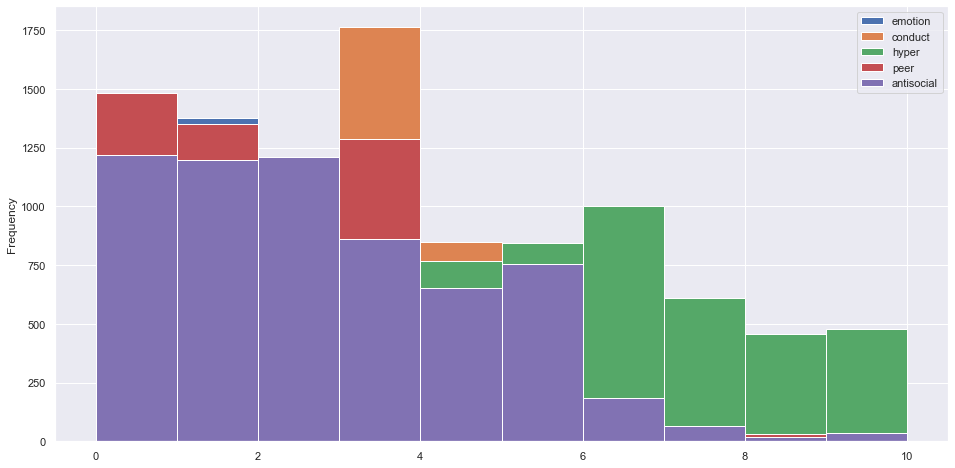

In [59]:
dfSDQ.plot(kind='hist', figsize=[16,8])


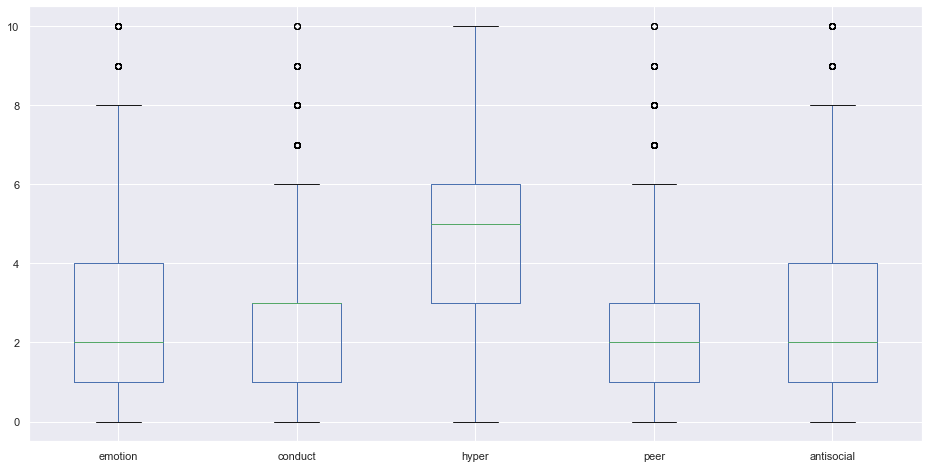

In [60]:
dfSDQ.plot(kind='box', figsize=[16,8])
plt.savefig('box_DV_MCS3.png')

In [ ]:
ax = sns.boxplot(data=dfSDQ, orient="h", palette="Set2")

## examine differences between sweeps

### number of anxious CM per sweep

# extract other SDQ items and prepare for factor analysis 

In [2]:
# load data 
df_SDQ = pd.read_csv('mcs3_parent.csv',encoding='mac_roman')
df_SDQ.shape

In [ ]:
# extract variables of interest 
df_SDQ = df_SDQ[['MCSID','column1','column2' etc ]]
# rename columns 
df_SDQ.columns = ['MCSID', 'worry','fear','nervous', etc]
df_SDQ.head()

In [ ]:
# only keep 1st cohort member and main interview
df_SDQ = df_SDQ.loc[df_SDQ['BCNUM00'] ==1]# only main interview
df_SDQ = df_SDQ.loc[df_SDQ['ACNUM00'] =='1st Cohort Member of the family'] # only CM

In [ ]:
# explore values per variable: 
df_SDQ['worry'].value_counts()

In [27]:
# replace invalid values by NaN: 
df_SDQ = df_SDQ.replace(['Not applicable'],np.NaN) 
df_SDQ = df_SDQ.replace(['Can t say'],np.NaN)
df_SDQ = df_SDQ.replace(["Don't Know"],np.NaN)

In [ ]:
df = df_SDQ.copy()

In [ ]:
# align directions for 'prosocial' variables: +1 for difficulties
cols = ['CPSDPF00', 'CPSDSR00', 'CPSDOR00', 'CPSDHU00',  'CPSDGF00'] ## to adapt 
df[cols] = df[cols].replace(['Not true','Certainly true'],['Certainly true','Not true'])

In [11]:
#keep rows with at least 85% non missing values
# X_nonan: remove rows with at least 1 nan 
df_nonan = df.dropna(axis = 0)
df_toimpute = df.dropna(axis = 0, thresh=3)# 15% of 22 = 3
df_toimpute.shape

(14947, 25)

In [47]:
df_nonan.shape

(11274, 40)

In [48]:
# only keep one measure per child 
df_toimpute_nodup = df_toimpute.drop_duplicates(subset=['MCSID'], keep='first', inplace=False)

In [49]:
df_toimpute_nodup.shape

(14765, 40)

In [50]:
#replace by 1 2 3 
# label encoding: only by column...
# use find and replace 
mapping = {'Not true' : 1, 'Somewhat true' : 2, 'Certainly true': 3}
df_parent_toimpute_nodup = df_parent_toimpute_nodup.replace(mapping)
df_parent_toimpute_nodup.head()

,MCSID,CPSECE00,CPSEWS00,CPSEMS00,CPSEWP00,CPSEHT00,CPSEOE00,CPSEPT00,CPSEAO00,CPSEEF00,...,CPSDDC00,CPSDNC00,CPSDKY00,CPSDOA00,CPSDVH00,CPSDST00,CPSDCS00,CPSDGB00,CPSDFE00,CPSDTE00
0,M10001N,1.0,1.0,3.0,1.0,3.0,2.0,1.0,2.0,1.0,...,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0
1,M10002P,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
3,M10007U,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0
5,M10011Q,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
7,M10015U,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


## impute data if only 3 variables missing out of 22 (~15%) 

In [35]:
#impute missing values: 
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
# IterativeImputer uses round-robin linear regression, modeling each feature with missing values as a function of other features, in turn
# It mimics the behavior of missForest, a popular imputation package for R.
imputer = KNNImputer(missing_values=np.nan,tol=0.0001,max_iter = 100)
X_imp = df_toimpute_nodup.copy()
X_imp = X_imp.drop(['MCSID'], axis=1)
X_imp = imputer.fit_transform(X_imp)

In [36]:
X_imp

array([[2., 3., 1., ..., 1., 2., 3.],
       [2., 1., 1., ..., 1., 2., 1.],
       [2., 2., 1., ..., 1., 1., 2.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [2., 2., 1., ..., 2., 1., 1.],
       [1., 2., 1., ..., 2., 2., 2.]])

In [37]:
# round imputed values to nearest integer
X_imp = np.rint(X_imp)

In [38]:
# convert into a dataframe 
X_imp=pd.DataFrame(X_imp, index=df_toimpute_nodup.index)
X_imp['MCSID']=df_toimpute_nodup['MCSID']
X_imp

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,MCSID
0,2.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,M10001N
1,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,M10002P
3,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,2.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,M10007U
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,M10011Q
7,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,M10015U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25999,2.0,2.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,1.0,...,3.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,M35869Q
26000,2.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,M35871J
26001,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,M35872K
26003,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,M35873L


## merge with demograhics based on MCSID

In [94]:
df_beh= pd.merge(df_demographics, X_imp, on="MCSID", indicator=True, how='right')

## save as csv file to use for factor analysis in R

In [ ]:
pd.DataFrame(df_beh).to_csv("MCS3_beh_factorAnalysis.csv", header=None, index = None )